# Web Scraping #

Web Scraping is rudimentary technique that gathers data by writing code that downloads webpages and then parses and extracts relevant data. It's a way to quickly obtain information from the web without having a human being take the time to visit each site and manually copy-paste each interesting field.

Web Scraping as a general practice is legal, although it can be seen as a nuissance and in some cases might be unethical. The pro-scraping argument is that you are simply automating a process that is freely available to any human being. The counter argument is that you are using the information in a way that the original authors may not have intended to gain some competitive advantage. Personally, in most situations, I don't believe that the counter arguments hold much weight. But we must keep some general guidelines in mind, such as:
* Respect the copyright and terms of use.
* Throttle your code to avoid limiting other people access to the resource.
* Do not take advantage of other people's work in a way that financially benefits you at their expense.
* It's the internet... somebody is doing it, but doesn't mean that we should too.

The best argument I have heard *against* web scraping is that most major data sources have a web API that is much easier to use than a web scraper. This official interface to the data means you are using it according to the author's intentions and that the author has built in limits and/or fees that guarantee you are not taking advantage of the service. So if a web API exists, you should use it. You'll have a lot more time to go outside and enjoy the sunshine because your code will be much simpler. And you won't have to consider any ethical questions. But if an API isn't available, here's how you do it.

In [ ]:
import urllib.request, urllib.error, urllib.parse

url = 'https://www.wunderground.com/history/monthly/us/ca/orange/date/2021-2'

response = urllib.request.urlopen(url)
content = response.read().decode('UTF-8')

print(content[:500])

In [ ]:
if "Daily Observations" in content:
    index = content.index("Daily Observations")
    print(content[index-100:index+500])

### No Dynamic Data! ###

Many major websites generate their web pages dynamically. The data that you are after does not live hardcoded in the website that you have downloaded. Instead, it is fetched through some additional JavaScript or PHP query. This means that the page you downloaded doesn't actually contain the information you are looking for.

[Stackoverflow #1](https://stackoverflow.com/questions/14516590/how-to-save-complete-webpage-not-just-basic-html-using-python)
[Stackoverflow #2](https://stackoverflow.com/questions/13854274/is-it-possible-to-get-complete-source-code-of-a-website-including-css-by-just-pr/13855315#13855315)

But, if it's just going to be a few pages, use your web browser and choose to save the complete webpage. This will download all of the sources used in the display that you are seeing.

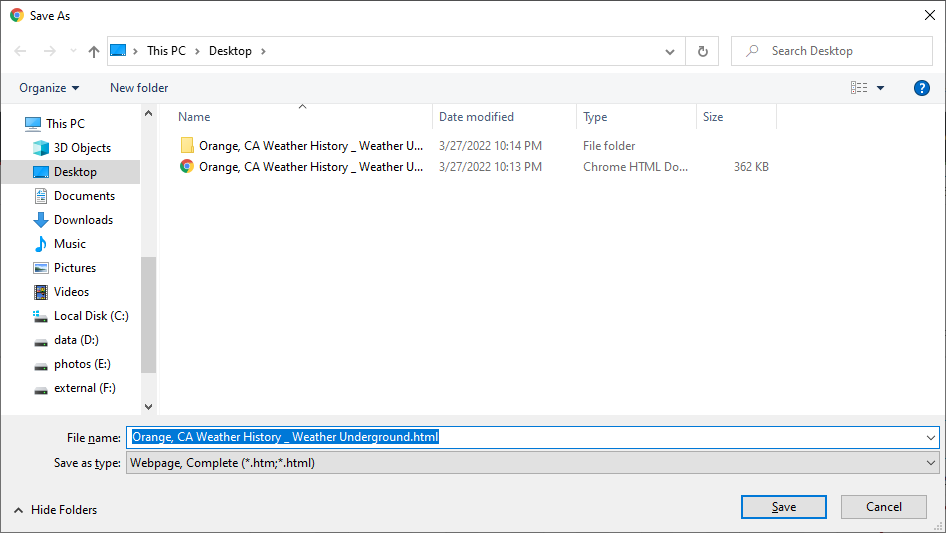

In [ ]:
# We're expecting an error!

filename = 'Orange, CA Weather History _ Weather Underground.html'
with open(filename, 'r') as fin:
    contents = fin.read()
    
print(contents[:500])

In [ ]:
filename = 'Orange, CA Weather History _ Weather Underground.html'
with open(filename, 'r', encoding='utf8') as fin:
    contents = fin.read()
    
print(contents[:500])

## Regular Expressions ##

Web Scraping makes extensive use of Regular Expressions. Regular Expressions (RE or Regex) are a markup language that allow you to quickly search for complex patterns in text. Most programming languages support some form of Regex, although there are minor differences in some of the finer details. Here are some useful articles if you have not used Regex before. I would especially recommend the first website as it provides a sandbox to explore regular expressions.
* https://regex101.com/
* https://www.programiz.com/python-programming/regex#python-regex
* https://stackoverflow.com/questions/4697882/how-can-i-find-all-matches-to-a-regular-expression-in-python
* https://www.regular-expressions.info/catastrophic.html


In [ ]:
import re

# For now, understand that most of the 'pattern' is looking for specific text
# exactly as it is written. The fancy Regex part is (?P<value>[\d\.]+)
# The (?P<value>   ) means that we are creating a Capture Group named 'value'
# Everything that matches the pattern [\d\.]+ will be captured and saved.
# The [\d\.] means that we are searching for a number 0-9 or a decimal point
# and that either one is equally good. The + means that we want at least one
# of the previous characters but capture as many in a row until you find the
# first non-matching character.
pattern = "<td _ngcontent-app-root-c196=\"\" class=\"ng-star-inserted\"> (?P<value>[\d\.]+) <\/td>"

result = re.findall(pattern, contents)
print(result)

In [ ]:
# We have all the table data as one long array... let's put it into a table
# format by finding the length of each row.

for month_length in [28, 29, 30, 31]:
    if len(result) // month_length == len(result) / month_length:
        print(f"This data is likely for a {month_length} days long month")

In [ ]:
# Now convert to an actual table that we can use!

import numpy as np
import pandas as pd

headings = ['Day', 'Temp Max', 'Temp Avg', 'Temp Min', 'Dew Point Max', 'Dew Point Avg', 'Dew Point Min',
            'Humidity Max', 'Humidity Avg', 'Humidity Min', 'Wind Speed Max', 'Wind Speed Avg', 'Wind Speed Min',
            'Pressure Max', 'Pressure Avg', 'Pressure Min', 'Precip (in)']

month_lengths = [28, 29, 30, 31]
for total_days in month_lengths:
    if len(result) / total_days == len(result) // total_days:
        print(f"This month is {total_days} days long")
        data = np.array(result)
        data = np.reshape(data, (17, total_days))
        data = pd.DataFrame(data.T, columns=headings).set_index('Day')
        break
        
data

## Web Scraping Modules ##

Web scraping might be better than viewing a page manually, but it is still pretty tedious. There are web scraping frameworks that try to make the job a little easier, and Beautiful Soup is one of the most common. It understands HTML and web document models, so it is able to parse websites without the need to write your own complex regular expressions. To use Beautiful Soup, you must understand the general layout of the target webpage. You can use Beautiful Soup to explore the webpage, like this:

In [ ]:
import requests
page = requests.get("https://dataquestio.github.io/web-scraping-pages/simple.html")
page.status_code

In [ ]:
page.content

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
print(soup.prettify())

In [ ]:
list(soup.children)

In [ ]:
for child in soup.children:
    print(f"'{child}'")
    print()

In [ ]:
[type(item) for item in list(soup.children)]

In [ ]:
html = list(soup.children)[2]

In [ ]:
list(html.children)

In [ ]:
body = list(html.children)[3]

In [ ]:
list(body.children)

In [ ]:
p = list(body.children)[1]
p.get_text()

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')
soup.find_all('p')

In [ ]:
results = soup.find_all('p')
for p in results:
    print(p.get_text())

## Beautiful Soup ##

To use Beautiful Soup, you must understand the general layout of the target webpage. Most web browsers have a document inspection feature that will help you do this. The Chrome inspector will even highlight sections on the webpage as you drag your mouse over the code. This allows you to drill down to the specific elements that you want to scrape to identify the correct web tags and parameters.

![screenshot](bs4_website_inspection.png)

In the above screenshot, I started with the `<body>` tag and expanded each element as I worked down to the `<section>` and then finally `<article>` tags. Every arrow pointing down is an element that I drilled down into by clicking on it.

In [ ]:
# pip install bs4

import requests
from bs4 import BeautifulSoup

# Step 1: Get the webpage content
url = "http://books.toscrape.com/"
response = requests.get(url)
if response.status_code != 200:
    raise ValueError(f"Failed to retrieve the webpage. Status code: {response.status_code}")

# Step 2: Create a BeatuifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Step 3: Extract data using the tags that I discovered earlier
books = soup.find_all("article", class_="product_pod")
for idx, book in enumerate(books):
    title = book.h3.a["title"]
    price = book.find("p", class_="price_color").text
    print(f"{idx+1}. Title: {title}, Price: {price}")

## Additional Pages ##

Notice this page only shows the first 20 books and that there are additional pages that can be reached by clicking the next button. You can create a loop that dynamically finds the URL for the next button and then wrap your code with a loop that cycles through each of them. It requires a little more inspection and BS4 code. 

In [ ]:
base_url = "http://books.toscrape.com/catalogue/"
next_page = base_url + "page-1.html"
while next_page:
    response = requests.get(next_page)
    #...

    next_button = soup.find("li", class_="next")
    if next_button:
        relative_url = next_button.a["href"]
        next_page = base_url + relative_url
    else:
        next_page = None

In [ ]:
# Step 1: Define the specific book URL
book_url = "http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html"

# Step 2: Fetch the page content
response = requests.get(book_url)

if response.status_code == 200:
    # Step 3: Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Step 4: Extract details
    title = soup.find("h1").text  # Book title
    price = soup.find("p", class_="price_color").text  # Book price
    availability = soup.find("p", class_="instock availability").text.strip()  # Availability
    description = soup.find("meta", {"name": "description"})["content"].strip()  # Description (from meta tag)
    rating = soup.find("p", class_="star-rating")["class"][1]  # Star rating (class attribute contains the rating)

    # Print the details
    print(f"Title: {title}")
    print(f"Price: {price}")
    print(f"Availability: {availability}")
    print(f"Description: {description}")
    print(f"Rating: {rating} stars")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

## Weather Underground and Beautiful Soup ##

Let's go back to the Weather Underground website and scrape it with Beautiful Soup. It's debatable, but I think this way is a little easier.

In [ ]:
# https://stackoverflow.com/questions/13074586/extracting-selected-columns-from-a-table-using-beautifulsoup
# see also https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/

filename = 'Orange, CA Weather History _ Weather Underground.html'
with open(filename, 'r', encoding='utf8') as fin:
    contents = fin.read()

soup = BeautifulSoup(contents, 'html.parser')

for row in soup.findAll('table')[0].tbody.findAll('tr'):
    first_column = row.findAll('th')[0].contents
    third_column = row.findAll('td')[2].contents
    print(first_column, third_column)

In [26]:
summary = soup.select('table[aria-labelledby="History summary"]')

In [27]:
month = soup.select('table[aria-labelledby="History days"]')

In [ ]:
days = soup.select('table[aria-labelledby="Days data"]')
for row in days[2].find_all('tr'):
    for col in row.find_all('td'):
        print(col.contents)
    print()

In [ ]:
for d in days:
    for row in d.find_all('tr'):
        cols = [c.contents[0].strip() for c in row.find_all('td')]
        print(cols)
    print()

In [ ]:
import numpy as np
import pandas as pd

results = []
for d in days:
    for row in d.find_all('tr'):
        for col in row.find_all('td'):
            value = col.contents[0].strip()
            try:
                results.append(float(value))
            except:
                continue

headings = ['Day', 'Temp Max', 'Temp Avg', 'Temp Min', 'Dew Point Max', 'Dew Point Avg', 'Dew Point Min',
            'Humidity Max', 'Humidity Avg', 'Humidity Min', 'Wind Speed Max', 'Wind Speed Avg', 'Wind Speed Min',
            'Pressure Max', 'Pressure Avg', 'Pressure Min', 'Precipitation (in)']

month_lengths = [28, 29, 30, 31]
for total_days in month_lengths:
    if len(results) / total_days == len(results) // total_days:
        print(f"This month is {total_days} days long")
        data = np.array(results)
        data = np.reshape(data, (17, total_days))
        data = pd.DataFrame(data.T, columns=headings).set_index('Day')
        break
        
data